# PCA: Western populations

This document contains the code to generate PCAs for WA specific populations

In [1]:
# from pathlib import Path
import ipyrad.analysis as ipa
import pandas as pd
import toyplot
import toyplot.pdf

In [2]:
probs = "/home/a1645424/hpcfs/analysis/shannon/data/popmaps/dropped-samples.tsv"

ala_popmap = "/home/a1645424/hpcfs/analysis/shannon/data/popmaps/ALA-popmap.txt"
hma_popmap = "/home/a1645424/hpcfs/analysis/shannon/data/popmaps/HMA-popmap.txt"
hst_popmap = "/home/a1645424/hpcfs/analysis/shannon/data/popmaps/HST-popmap.txt"

ala_ignore = '../results/population-structure/ALA-ignore.txt'
hma_ignore = '../results/population-structure/HMA-ignore.txt'
hst_ignore = '../results/population-structure/HST-ignore.txt'

# Genotype data
ala_50kb_LD = "../results/ipyrad/ALA-stringent_outfiles/ALA-stringent.LD50k.snps.hdf5"
hma_50kb_LD = "../results/ipyrad/HMA-stringent_outfiles/HMA-stringent.LD50k.snps.hdf5"
hst_50kb_LD = "../results/ipyrad/HST-stringent_outfiles/HST-stringent.LD50k.snps.hdf5"

In [3]:
# Problem samples
problems = pd.read_csv(
    probs,
    sep = "\t",
    comment="#",
    names = ["sample", "population"]
)
problems = dict(problems.groupby("population")["sample"].apply(list))

In [4]:
# Accessory function for dropping samples
def drop_samples(probs: dict, pop_dict: dict) -> dict:
    for k,v in probs.items():
        if k in pop_dict.keys():
            for sample in v:
                if sample in pop_dict[k]:
                    print(f"Dropping: {sample}")
                    pop_dict[k].remove(sample)
    return pop_dict
    
def drop_pop(drop_list: list, pop_dict: dict) -> dict:
    for p in drop_list:
        if p in pop_dict.keys():
            print(f"Dropping: {p}")
            pop_dict.pop(p)
    return(pop_dict)

## *Aipysurus laevis*

In [10]:
with open(ala_ignore) as f:
    ignore = f.read().splitlines()

# Population-map file
populations = pd.read_csv(ala_popmap, comment="#", sep=" ", names=["sample", "grouping"])

# Convert to dictionary
ala_imap = dict(populations.groupby("grouping")["sample"].apply(list))
ala_imap = drop_samples(probs=problems, pop_dict=ala_imap)
ala_imap = drop_pop(drop_list=ignore, pop_dict=ala_imap)

ala_minmap = {i: 0.5 for i in ala_imap}

Dropping: ALA-AL401-3991432
Dropping: ALA-AL404-3991435
Dropping: Ashmore
Dropping: North_QLD
Dropping: Scott_Reef
Dropping: Gulf_of_Carpentaria
Dropping: New_Caledonia
Dropping: Heywood_Shoal


In [11]:
ala_pca = ipa.pca(
    data=ala_50kb_LD,
    imap=ala_imap,
    minmap=ala_minmap,
    mincov=0.75,
    impute_method="sample",
)

ala_pca.run()

Samples: 81
Sites before filtering: 133969
Filtered (indels): 0
Filtered (bi-allel): 1623
Filtered (mincov): 81186
Filtered (minmap): 70239
Filtered (subsample invariant): 55277
Filtered (minor allele frequency): 0
Filtered (combined): 106105
Sites after filtering: 26754
Sites containing missing values: 23531 (87.95%)
Missing values in SNP matrix: 187084 (8.63%)
SNPs (total): 26754
SNPs (unlinked): 8570
Imputation: 'sampled'; (0, 1, 2) = 88.0%, 7.9%, 4.1%
Subsampling SNPs: 8570/26754


In [12]:
# store the PC axes as a dataframe
ala_pcs = pd.DataFrame(ala_pca.pcaxes[0], index=ala_pca.names)
ala_variance = pd.DataFrame(ala_pca.variances[0])

# write the PC axes to a CSV file
ala_pcs.to_csv("../results/population-structure/pca/ALA-stringent_pca-WA.csv")
ala_variance.to_csv("../results/population-structure/pca/ALA-stringent_pca-WA-variance.csv")

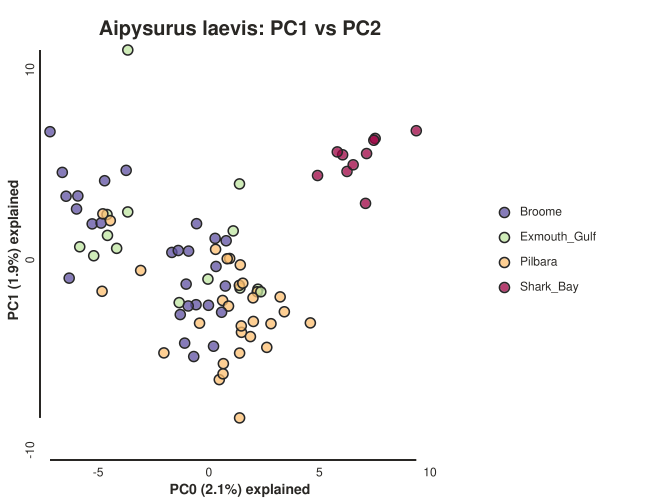

In [13]:
# Draw and save 'figure object' to variable figure
figure, _ = ala_pca.draw(
    0, 1,
    width=600, height=500,
    label = "Aipysurus laevis: PC1 vs PC2"
)
figure.style.update({"background-color": "white"})
figure.width = 650

# save as PDF
toyplot.pdf.render(figure, "../results/population-structure/pca/ALA-stringent_PCA-1_2-WA.pdf")
figure

## *Hydrophis major*

In [19]:
with open(hma_ignore) as f:
    ignore = f.read().splitlines()

# Population-map file
populations = pd.read_csv(hma_popmap, comment="#", sep=" ", names=["sample", "grouping"])

# Convert to dictionary
hma_imap = dict(populations.groupby("grouping")["sample"].apply(list))
hma_imap = drop_samples(probs=problems, pop_dict=hma_imap)
hma_imap = drop_pop(drop_list=ignore, pop_dict=hma_imap)

hma_minmap = {i: 0.5 for i in hma_imap}

Dropping: Gulf_of_Carpentaria
Dropping: New_Caledonia
Dropping: South_QLD


In [20]:
hma_pca = ipa.pca(
    data=hma_50kb_LD,
    imap=hma_imap,
    minmap=hma_minmap,
    mincov=0.75,
    impute_method="sample",
)

hma_pca.run()

Samples: 49
Sites before filtering: 52666
Filtered (indels): 0
Filtered (bi-allel): 511
Filtered (mincov): 36203
Filtered (minmap): 31869
Filtered (subsample invariant): 12254
Filtered (minor allele frequency): 0
Filtered (combined): 41432
Sites after filtering: 11089
Sites containing missing values: 10720 (96.67%)
Missing values in SNP matrix: 58868 (10.83%)
SNPs (total): 11089
SNPs (unlinked): 4963
Imputation: 'sampled'; (0, 1, 2) = 83.4%, 11.1%, 5.5%
Subsampling SNPs: 4963/11089


In [21]:
hma_pcs = pd.DataFrame(hma_pca.pcaxes[0], index=hma_pca.names)
hma_pcs.to_csv("../results/population-structure/pca/HMA-stringent_pca-WA.csv")

hma_variance = pd.DataFrame(hma_pca.variances[0])
hma_variance.to_csv("../results/population-structure/pca/HMA-stringent_pca-WA-variance.csv")

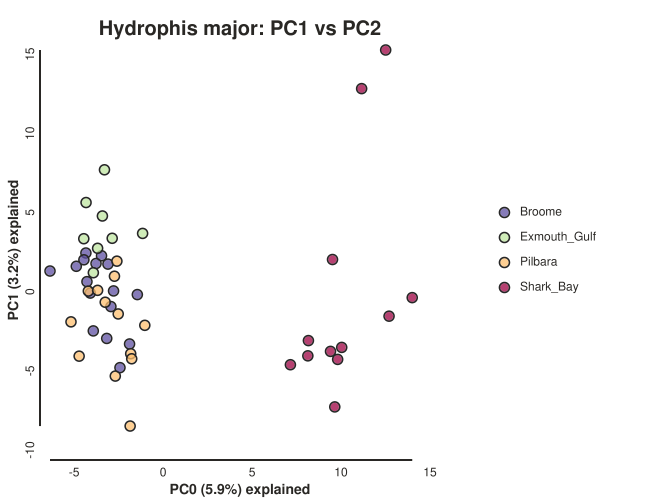

In [22]:
# Draw and save 'figure object' to variable figure
figure, _ = hma_pca.draw(
    0, 1,
    width=600, height=500,
    label = "Hydrophis major: PC1 vs PC2"
)
figure.style.update({"background-color": "white"})
figure.width = 650

# save as PDF
toyplot.pdf.render(figure, "../results/population-structure/pca/HMA-stringent_PCA-1_2-WA.pdf")
figure

## *Hydrophis stokesii*

In [23]:
with open(hst_ignore) as f:
    ignore = f.read().splitlines()

# Population-map file
populations = pd.read_csv(hst_popmap, comment="#", sep=" ", names=["sample", "grouping"])

# Convert to dictionary
hst_imap = dict(populations.groupby("grouping")["sample"].apply(list))
hst_imap = drop_samples(probs=problems, pop_dict=hst_imap)
hst_imap = drop_pop(drop_list=ignore, pop_dict=hst_imap)

hst_minmap = {i: 0.5 for i in hst_imap}

Dropping: HST-KLS0360-2562274
Dropping: HST-KLS0634-2892478
Dropping: HST-KLS1679-4013420
Dropping: HST-KLS1677-4013418
Dropping: HST-KLS0660-2892454
Dropping: HST-KLS0886-2892390
Dropping: HST-KLS0941-2892545
Dropping: HST-KLS0897-2892551
Dropping: HST-KLS0896-2892403
Dropping: HST-As012-3991487
Dropping: HST-As010-3991485
Dropping: HST-KLS1204-3593361
Dropping: Gulf_of_Carpentaria
Dropping: Ashmore
Dropping: North_QLD
Dropping: Heywood_Shoal


In [24]:
hst_pca = ipa.pca(
    data=hst_50kb_LD,
    imap=hst_imap,
    minmap=hst_minmap,
    mincov=0.75,
    impute_method="sample",
)

hst_pca.run()

Samples: 88
Sites before filtering: 90080
Filtered (indels): 0
Filtered (bi-allel): 1007
Filtered (mincov): 56983
Filtered (minmap): 55212
Filtered (subsample invariant): 35803
Filtered (minor allele frequency): 0
Filtered (combined): 75049
Sites after filtering: 14638
Sites containing missing values: 12341 (84.31%)
Missing values in SNP matrix: 100877 (7.83%)
SNPs (total): 14638
SNPs (unlinked): 6120
Imputation: 'sampled'; (0, 1, 2) = 86.3%, 8.4%, 5.4%
Subsampling SNPs: 6120/14638


In [25]:
hst_pcs = pd.DataFrame(hst_pca.pcaxes[0], index=hst_pca.names)
hst_pcs.to_csv("../results/population-structure/pca/HST-stringent_pca-WA.csv")

hst_variance = pd.DataFrame(hst_pca.variances[0])
hst_variance.to_csv("../results/population-structure/pca/HST-stringent_pca-WA-variance.csv")

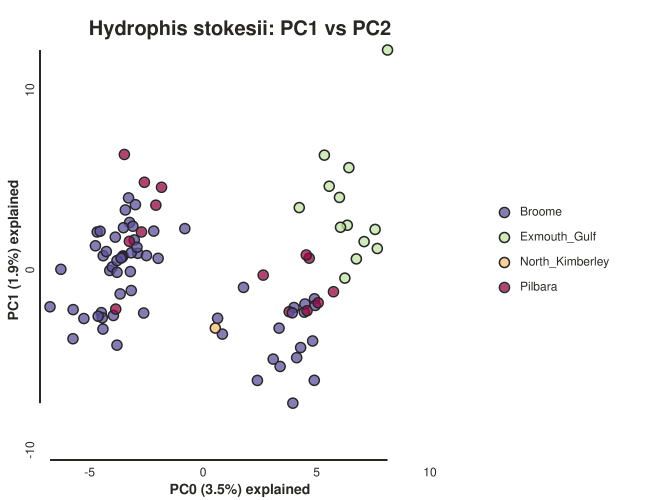

In [26]:
# Draw and save 'figure object' to variable figure
figure, _ = hst_pca.draw(
    0, 1,
    width=600, height=500,
    label = "Hydrophis stokesii: PC1 vs PC2"
)
figure.style.update({"background-color": "white"})
figure.width = 650

# save as PDF
toyplot.pdf.render(figure, "../results/population-structure/pca/HST-stringent_PCA-1_2-WA.pdf")
figure